In [1]:
from torch import nn, tensor
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
#%matplotlib widget
import matplotlib.pyplot as plt 
import os

In [2]:
class QuadraticNet1D(nn.Module):
    def __init__(self):
        super(QuadraticNet1D, self).__init__()
        self.w = nn.Parameter(tensor(1.0))

    def forward(self):
        return self.w**2

In [3]:
my_quadratic = QuadraticNet1D()
beta_0 = .9999
#beta_1 = np.power(beta_0,4)
beta_1 = 0.00001
print(beta_0**2 /np.sqrt(beta_1))
adam_params = [beta_0, beta_1]
adam_optim = optim.Adam(my_quadratic.parameters(), betas=adam_params)
num_epochs = 10000

316.16452362591224


[1.0, 1.0]


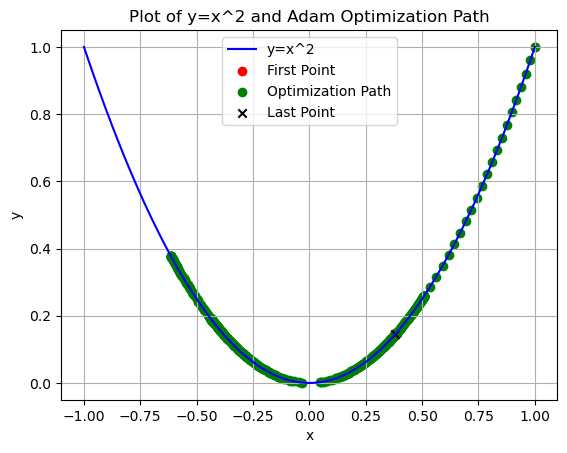

In [4]:
my_quadratic = QuadraticNet1D()
adam_optim = optim.Adam(my_quadratic.parameters(), betas=adam_params)
first_point = [my_quadratic.w.item(), my_quadratic.forward().item()]
point_array = np.zeros((num_epochs+1, 2))
point_array[0,:] = first_point
for epoch in range(num_epochs):
    adam_optim.zero_grad()
    loss = my_quadratic.forward()
    loss.backward()
    adam_optim.step()
    point_array[epoch+1,:] = [my_quadratic.w.item(), my_quadratic.forward().item()]
    
    
print(first_point)
x = np.linspace(-1, 1, 100)
y = x**2

plt.plot(x, y, color='blue', label='y=x^2')
plt.scatter(first_point[0], first_point[1], color='red', label='First Point')
plt.scatter(point_array[:-1:20,0], point_array[:-1:20,1], color='green', label='Optimization Path')
plt.scatter(point_array[-1,0], point_array[-1,1], color='black', label='Last Point', marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y=x^2 and Adam Optimization Path')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join('./', 'adam_bad_initial.png'))

[1.0, 1.0]


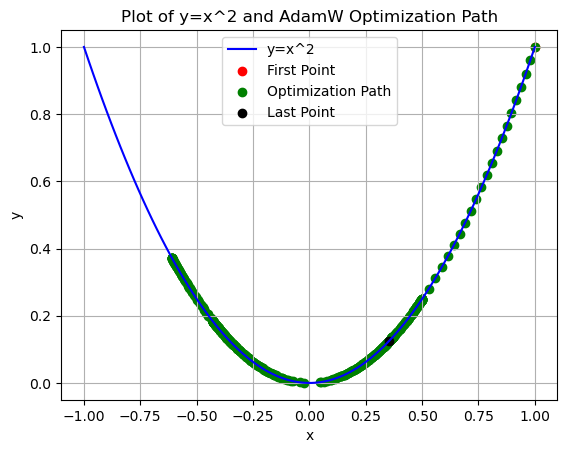

In [5]:
my_quadratic2 = QuadraticNet1D()
adamW_optim = optim.AdamW(my_quadratic2.parameters(), betas=adam_params)
first_point = [my_quadratic2.w.item(), my_quadratic2.forward().item()]
point_array2 = np.zeros((num_epochs+1, 2))
point_array2[0,:] = first_point
for epoch in range(num_epochs):
    adamW_optim.zero_grad()
    loss = my_quadratic2.forward()
    loss.backward()
    adamW_optim.step()
    point_array2[epoch+1,:] = [my_quadratic2.w.item(), my_quadratic2.forward().item()]
    
    
print(first_point)
x = np.linspace(-1, 1, 100)
y = x**2

plt.plot(x, y, color='blue', label='y=x^2')
plt.scatter(first_point[0], first_point[1], color='red', label='First Point')
plt.scatter(point_array2[:-1:20,0], point_array2[:-1:20,1], color='green', label='Optimization Path')
plt.scatter(point_array2[-1,0], point_array2[-1,1], color='black', label='Last Point')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y=x^2 and AdamW Optimization Path')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join('./', 'adamw_bad_initial.png'))